NAME:

# INF TC1 - TD7 (2h) - Rendu de monnaie

## Utilisation de Graphviz

- Lancez la cellule suivante pour visualiser les arbrees construits pendant le TD. 
- Si Graphviz n'est pas correctement installé, passez les cellules de visialisation.

In [1]:
from graphviz import Digraph
from IPython.display import display, Image
import graphviz
def plot_graph(graph):
    dot = graphviz.Digraph()

    for node in graph:
        dot.node(str(node))

    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            dot.edge(str(node), str(neighbor), label=str(weight))
    display(dot)

---

## Objectif du TD

Dans ce TD nous allons aborder le problème dit de de _rendu de monnaie_ selon plusieurs méthodes algorithmiques : 

- technique de programmation Gloutonne
- chemin minimal dans un arbre de recherche 
- Programmation Dynamique (cela fera l'objet du **prochain TD7bis et du devoir à rendre**)

Vous serez amené dans ce TD (et les suivant) à créer une structure de données de graphe et une méthode de parcours de celui-ci. 

**Les réponses de la partie sur la programmation dynamique feront l'objet d'un autre sujet de TD et d'un rendu sous forme de rapport à rendre sur Moodle.**

## Le problème de "rendu de monnaie"

Le problème de rendu de monnaie est très fréquent dans la vie de tous les jours et peut être défini comme suit : étant donné un montant, une machine capable de rendre la monnaie doit rendre ce montant au client à partir de pièces (1c, 2€, etc.) et de billets (10€, 50€, etc.). On suppose pour simplifier qu'il n'y a que des pièces en centimes; un billet de 5€ sera représenté comme une pièce de 500 centimes. On suppose également (dans un premier temps) qu'il existe un nombre suffisant (autant que nécessaire) de chaque pièce, mais dans un second temps nous introduirons des contraintes de disponibilité des pièces.

|               | **la table S**         | **la table D**                   |
|---------------|------------------------|----------------------------------|
| **indice $i$**| **Valeur ($v_i$)**     | **Disponibilité ($d_i$)**        |
| 1             | 1c                     | nombre de pièces de 1c disponibles |
| 2             | 2c                     | nombre de pièces de 2c disponibles |
| 3             | 5c                     | ...                              |
| 4             | 10c                    | ...                              |
| 5             | 20c                    | ...                              |
| 6             | 50c                    | ...                              |
| 7             | 100 (1€)               | pièces de 1€                      |
| 8             | 200 (2€)               | pièces de 2€                      |
| 9             | 500 (5€)               | billets de 5€                     |
| 10            | 1000                   | billets de 10€                    |
| 11            | 2000                   | billets de 20€                    |
| 12            | 5000                   | billets de 50€                    |
| 13            | 10000                  | billets de 100€                   |


De manière plus formelle, un stock de pièces est un tuple $S=(v_1, v_2, ..., v_n)$ où l'entier $v_i > 0$ est la valeur de la $i^{ème}$ pièce. Pour refléter le fait qu'on a des pièces de 1, 2 et 5c, $S$ contiendra $v_1=1$ (1 centime), $v_2=2, v_3=5$. Le problème de monnaie est un problème d'optimisation combinatoire $(S,M)$ permettant de trouver le tuple $T=(x_1, x_2, ..., x_n)$ avec $x_i \geq 0$ qui minimise $ \sum_{i=1}^n x_i$ sous la contrainte $\sum_{i=1}^n x_i.v_i=M$. Autrement dit, nous souhaitons aussi bien obtenir le montant exact, que minimiser le nombre total de pièces $x_i$ de valeur $v_i$ utilisées. Appelons $Q(S,M) = \sum_{i=1}^n x_i$ la quantité de pièces à rendre pour le montant *M* étant donné le système *S* décrit dans la Table~1. Une solution optimale $Q_{opt}$ à ce problème est telle que *Q(S,M)* soit minimale :

$Q_{opt}(S,M) = min \ \sum_{i=1}^n x_i$.

Dans certaines situations il faudra gérer le nombre de pièces/billets disponibles (la table *D*). Nous noterons *d[i]=k* pour dire : il y a *k* pièces/billets du montant *$v_i$* disponibles (pièces ou billets du montant *v[i]*) à l'indice *i* dans la table *S*. On supposera cependant dans un premier temps qu'il y a un nombre suffisant de chaque pièce/billet dans le tableau S. On supposera également que *S* est ordonné dans un ordre croissant.


## Exemples

**M = 9€:** étant donné S dans la Table ci-dessous, la solution qui minimise le nombre total de pièces rendues à 3 est *T=(0,0,0,0,0,0,0,2,1,0,0,0,0)*. Donc, $Q_{opt}(S,9) = \min \ Q(S,9) = 3$. Détails (avec des pièces $\geq$ 1€) :


| Description                                            | T                                      | Rendu                                      | 
|--------------------------------------------------------|----------------------------------------|---------------------------------------------|
| 9 pièces de 1€ et 0 pour toutes les autres            | T=(0,0,0,0,0,0,0,9,0,0,0...0)          | $\rightarrow$ 9 pièces                      | $Q(S,9) =9$  |
| $\circ$ 5 $\times$ 1€ + 2 $\times$ 2€, 0 pour les autres | T=(0,0,0,0,0,0,0,5,2,0,0...0)       | $\rightarrow$ 7 pièces                      | $Q(S,9) =7$  |
| $\circ$ 1 $\times$ 1€ + 4 $\times$ 2€, 0 pour les autres | T=(0,0,0,0,0,0,0,1,4,0,0...0)       | $\rightarrow$ 5 pièces                      | $Q(S,9) =5$  |
| $\circ$ 2 $\times$ 2€ + 1 $\times$ 5€, 0 pour les autres | T=(0,0,0,0,0,0,0,0,2,1,0...0)       | $\rightarrow$ 3 pièces                      | **$Q(S,9) =3$** |
| $\circ$ 3 $\times$ 1 + 3 $\times$ 2, 0 pour les autres  | T=(0,0,0,0,0,0,0,3,3,0,0...0)       | $\rightarrow$ 6 pièces                      |              |
| $\circ$ 4 $\times$ 1 + 1 $\times$ 5, 0 pour les autres  | T=(0,0,0,0,0,0,0,4,0,1,0...0)       | $\rightarrow$ 5 pièces                      |              |
| $\circ$ etc. sans parler des solutions avec des centimes ! |                                  |                                             |              |
<center>
    <i>Table 1</i>
</center>

**M = 1989€:** pour rendre la somme de 1989€ pièces (sans les centimes), on aura : $1989 = 500 \times 3 + 488 = 500 \times 3 + 200 \times 2 + 50 \times 1 + 20 \times 1 + 10 \times 1 + 5 \times 1 + 2 \times 2$, soit $3+2+1+1+1 = 8$ grosses pièces (billets) et $1+2 = 3$ pièces.


## Résolution du problème

L'exemple de la Table 1 est un système *canonique*, c'est à dire qu'en choisissant systématiquement les pièces de plus grande valeur (algorithme glouton) on obtient toujours la solution optimale. Il existe des systèmes pour lesquels c'est moins simple, par exemple $S=(1,7,23)$. Pour **M = 28**, en choisissant en priorité les pièces de plus grande valeur on trouvera $T=(5,0,1)$ (6 pièces), alors que la solution optimale est $T=(0,4,0)$ (4 pièces).

Dans le cas général, ce problème est démontré NP-difficile, c'est-à-dire qu'on ne connaît pas d'algorithme qui puisse le résoudre en complexité polynomiale par rapport à la taille de $S$.
Il existe plusieurs approches :

1. Approche gloutonne (pas toujours optimale) 
2. Recherche de chemin de longueur minimale avec (ou sans) un arbre de recherche, ... 
3. Programmation Dynamique, ... et autres méthodes algorithmiques (cf. quasi-Dijkstra)
  
Il existe d'autres approches de résolutions algorithmiques ou non-algorithmiques comme par exemple un système d'équations à optimiser. Nous allons dans ce TD aborder les différentes approches algorithmiques mentionnées ci-dessus.


## 1. Algorithme Glouton

Les techniques de programmation gloutonnes ont la particularité de faire des choix locaux à chaque étape de calcul. Cette méthode ne donne pas forcément un nombre minimal de pièces mais elle est simple à comprendre et à implémenter. Son application au problème de rendu de monnaie est simple : on trouve la pièce la plus grande inférieure ou égale à $M$. Soit $v_i$ cette pièce. On utilise ($x_i  = M \ div \ v_i$) fois la pièce $v_i$; le reste à traiter sera $M'=(M \mod v_i)$. Ensuite, on recommence suivant le même principe pour satisfaire $M'$. Ce qui donne le pseudo-code d'algorithme suivant (qui fait l'hypothèse d'un nombre illimité de pièces, on ne tient pas compte ici de $D$ : $d_i=\infty$) :

```
Fonction Monnaie_Gloutonne
Entrées : la somme S, M
Sorties : le vecteur  T = Q(S,M) : le nombre de pièces nécessaires 
    M'=M
    Répéter
        Chercher dans S l'indice i tel que Vi =< M' 
        Ti = M' div Vi
        M' = M' mod Si
    Jusqu'à M' = 0

    Constituer T avec les Ti utilisés
        Q(S,M) = somme de i=1 a i=n de T_i
    T est la valeur de sortie de l'algorithme
Fin Monnaie_Gloutonne
```

Pour **M = 236,65€** cet algorithme se déroule de la manière suivante :

$23665 \geq 10000$

  - $T_{13}=23665 \ div \ 10000 = 2$ ($T_{13}$ correspond à 100€)
  - $M'=23665 \ mod \ 10000 = 3665$ 

$3665 \geq 2000$

  - $T_{11}=3665 \ div \ 2000 = 1$
  - $M'=3665 \ mod \ 2000 = 1665$
      ...
      
$\rightarrow$ On obtient $T_{1..13}=(0,0,1,1,0,1,1,0,1,1,1,0,2)$ et $Q(S,M) = 9$

A noter qu'en Python les indices commencent à zéro ! Faire -1 sur les indices ci-dessus.


**Question 1.1 -** Implémenter l'algorithme glouton ci-dessus.

In [2]:
def gloutonne(S: list, M: int) -> tuple:
    """
    Algorithme glouton sans nombre limité de pièces

    Args:
    - S (list): Une liste d'entier représentant les pièces triées par ordre décroissant
    - M (int): La somme à atteindre

    Returns:
    - tuple: (True, T(S,M)) si succès OU (False, None) si échec
    """
    T = [0] * len(S)
    for i, piece in enumerate(S):
        T[i] = M // piece
        M = M % piece 
    if M != 0:
        return False, None

    return True, T
    

Les tests suivants doivent être validés :

In [3]:
Rep = gloutonne(sorted([1, 7, 23], reverse=True), 28)
print(Rep[1], ': ', sum(Rep[1]),' pièces') if Rep[0] else print('Echec') 
# [1, 0, 5] :  6  pièces

Rep = gloutonne(sorted([7, 23], reverse=True), 5)
print(Rep[1], ': ', sum(Rep[1]),' pièces') if Rep[0] else print('Echec') 
# Echec car M < la + petite pièce

Rep = gloutonne(sorted([7, 23], reverse=True), 8)
print(Rep[1], ': ', sum(Rep[1]),' pièces') if Rep[0] else print('Echec') 
# Echec car on ne peut jamais faire la monnaie avec cette S

[1, 0, 5] :  6  pièces
Echec
Echec


**Question 1.2 -** Proposez une modification du pseudo-code ci-dessus pour prendre en compte un nombre **limité** de pièces (en prenant en compte la table $D$). Implémenter cet algorithme modifié (vous fournirez vos propres valeurs de disponibilité dans $D$).

In [4]:
def gloutonne_avec_D(S: list, M: int, D: list) -> tuple:
    """
    Algorithme glouton avec nombre limité de pièces

    Args:
    - S (list): Une liste d'entier représentant les pièces
    - M (int): La somme à atteindre
    - D (list): La disponibilité des pièces
    
    Returns:
    - tuple: (True, T(S,M)) si succès OU (False, None) si échec
    """
    T = [0] * len(S)
    for i, piece in enumerate(S):
        T[i] = min(M // piece, D[i])
        M = M - T[i] * piece
    if M != 0:
        return False, None

    return True, T

Les tests suivants doivent être validés :

In [5]:
Rep= gloutonne_avec_D([23, 7, 1], 28, [0, 10, 10]) 
print(Rep[1], ': ', sum(Rep[1]),' pièces utilisées') if Rep[0] else print('Echec')
# [0, 4, 0] :  4  pièces utilisées

Rep= gloutonne_avec_D([23, 7, 1], 28, [0, 1, 21])
print(Rep[1], ': ', sum(Rep[1]),' pièces utilisées') if Rep[0] else print('Echec')
# [21, 1, 0] :  22  pièces utilisées

[0, 4, 0] :  4  pièces utilisées
[0, 1, 21] :  22  pièces utilisées


Vous noterez que la méthode Gloutonne ne garantit pas que *Q(S, M)* soit minimal comme les tests l'ont montré pour M=28 et S=(1, 7, 23).  La méthode Gloutonne utilise un optimum local (choix de la plus grande pièce) qui ne débouche pas forcément sur un optimum global. Cependant, elle est très simple à calculer.

## 2. Chemin minimal dans un arbre

Une deuxième méthode consiste à construire toutes les solutions possibles sous forme d'arbre, et ensuite de choisir la solution de manière globale. Cette méthode est plus complexe à mettre en oeuvre mais donne une solution optimale.

<center>
<img src="monnaie-graph.png" alt="Image originale" style="height:10cm;">
</center>
    
Exemple d'arbre de recherche résultant *M=28* et *S=(1,7,23)*. C'est à dire, on a seulement des pièces de 1, 7 et 23 (€ ou cents) en nombre suffisant. Dès qu'on atteint 0, on remonte de ce 0 à la racine pour obtenir la solution minimale donnant le nombre minimal d'arcs entre ce 0 et la racine. On remarque qu'on utilisera 4 pièces de 7c pour avoir 28c. Par ailleurs, on remarque que le choix initial de 23 (à gauche de l'arbre) laisse le montant *M'=5c* à satisfaire lequel impose le choix de 5 pièces de 1c. En bleu les autres chemins choisissant une pièce de 23.

On construit un arbre de recherche (arbre des possibilités) dont la racine est *M*. Chaque noeud de l'arbre représente un montant : les noeuds autres que la racine initiale représentent $M' < M$ une fois qu'on aura utilisé une (seule) des pièces de $S$ (parmi 1, 7 ou 23€). La pièce utilisée pour aller de $M$ à $M'$ sera la valeur de l'arc reliant ces deux montants. Cet arbre est donc développé par niveau (en largeur). On arrête de développer un niveau supplémentaire dès qu'un noeud a atteint 0 auquel cas une solution sera le vecteur des valeurs (des arcs) allant de la racine à ce noeud.

Le principe de l'algorithme correspondant à un parcours en largeur dont la version itérative utilise une *File d'attente* est :

```
Fonction Monnaie_graphe
% on suppose qu'il y a un nombre suffisant de chaque pièce/billet dans la tableau S
Entrées : la somme M
Sorties : le vecteur T et Qopt(S,M) le nombre de pièces nécessaires 
    File F = vide ;
    Arbre A contenant un noeud racine dont la valeur = M
    Enfiler(M)                  % la file F contient initialement M
    Répéter
        M'= défiler()
        Pour chaque pièce vi =< M'  disponible dans S :
              S'il existe dans l'arbre A un noeud dont la valeur est M' - vi
              Alors établir un arc étiqueté par vi allant de M' à ce noeud
              Sinon 
                Créer un nouveau noeud de valeur M' - vi dans A et lier ce noeud 
                à M' par un arc  étiqueté par vi
                Enfiler ce nouveau noeud 
              Fin Si
    Jusqu'à (M' - vi = 0) ou (F = vide)

    Si (F est vide Et M' - vi /= 0) 
    Alors il y a un problème dans les calculs ! STOP.
    Sinon Le dernier noeud créer porte la valeur 0
          On remonte de ce noeud à la racine et on comptabilise dans T où 
          Ti = le nombre d'occurrences des arcs étiquetés vi de la racine 
          au noeud v de valeur 0 
          $Q(S,M) = somme de i=1 a i=n de T_i$                      
    Fin si
Fin Monnaie_graphe
```

**Question 2.1 -** Ecrire un algorithme de construction de l'arbre.

In [6]:
def Monnaie_graphe(S: list, M: int) -> dict:
    """
    Génère un graphe représentant les combinaisons de pièces possibles pour atteindre un montant spécifié
    en utilisant un ensemble donné de valeurs de pièces.

    Args:
    - S (list): Une liste d'entiers représentant les valeurs disponibles des pièces.
    - M (int): Un entier spécifiant le montant cible à atteindre.

    Returns:
    - graph: Un graphe (représenté sous forme de dictionnaire)
    """
    file = [M]
    graph = {M: {}}              
    while file:
        M = file.pop(0)
        for piece in S: 
            if piece <= M:
                
                if M - piece in graph:
                    graph[M][M-piece] = piece

                else:
                    graph[M - piece] = {}
                    graph[M][M-piece] = piece               
                    file.append(M-piece)

        #if piece == M:      # on peut s'arrêter dès qu'on a ajouté le noeud 0
        #    break           # pas l'arbre complet mais contient le plus court chemin 

    
    return graph

        
    
    

In [7]:
A = Monnaie_graphe([1, 2, 5], 7)
for m in A: 
    print(f"{m}: {A[m]}")

7: {6: 1, 5: 2, 2: 5}
6: {5: 1, 4: 2, 1: 5}
5: {4: 1, 3: 2, 0: 5}
2: {1: 1, 0: 2}
4: {3: 1, 2: 2}
1: {0: 1}
3: {2: 1, 1: 2}
0: {}


Vous devriez pouvoir visualiser votre arbre avec la méthode `plot_graph` :

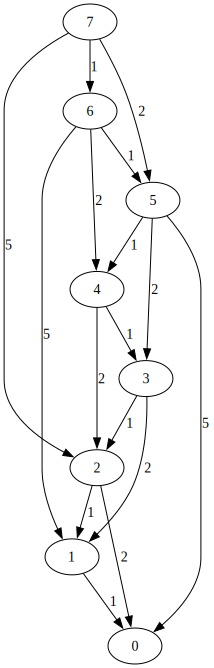

In [8]:
plot_graph(A)

**Question 2.2 -** Ecrire un algorithme de recherche du chemin le plus court dans l'arbre.

In [9]:
def plus_court_chemin(graph: dict, start: str) -> int:
    """
    Calcule les distances les plus courtes depuis un nœud de départ dans un graphe.

    Args:
    - graph (dict): Un dictionnaire représentant le graphe
    - start (str): Le nœud de départ à partir duquel calculer les distances.

    Returns:
    - int: la taille du chemin
    """
    file = [start]
    distance = {start : 0}
    while file: 
        m = file.pop(0)

        for rem in graph[m]:
            if rem not in distance:
                distance[rem] = distance[m] + 1
                file.append(rem)

            if rem == 0:
                return distance[0]

    return -1  # si on n'a pas trouvé de chemin jusqu'à 0




In [10]:
print(plus_court_chemin(A, 7))
assert plus_court_chemin(A, 7) == 2

2


**Question 2.3 -** Compléter l'algorithme précédent avec un mécanisme de backtracking permettant de retourner le plus court chemin utilisé.

In [11]:
def plus_court_chemin_backtracking(graph: dict, start: str) -> list:
    """
    Calcule les distances les plus courtes depuis un nœud de départ dans un graphe.

    Args:
    - graph (dict): Un dictionnaire représentant le graphe
    - start (str): Le nœud de départ à partir duquel calculer les distances.

    Returns:
    - list: le chemin utilisé et les montants intermédiaires
    """
    file = [start]
    parent = {}
    while file: 
        m = file.pop(0)

        for rem in graph[m]:
            if rem not in parent:
                parent[rem] = m 
                file.append(rem)

        if m == 0:
            break

    chemin = [0]
    while chemin[-1] != start:
        m = chemin[-1]
        chemin.append(parent[m])
    chemin.reverse()
    return chemin




In [12]:
print(plus_court_chemin_backtracking(A, 7))
assert plus_court_chemin_backtracking(A, 7) == [7, 5, 0]

[7, 5, 0]


A noter que vous pouvez combiner la construction et la recherche du plus court chemin (en vous arrêtant au premier 0 rencontré). Cependant, cette methode a pour inconvénient d'explorer un très large espace de recherche (qui devient vite très grand). Un autre inconvénient est le calcul de solutions dont on sait qu'elles ne seront pas optimales.